# Predict

In [1]:
from matplotlib import pyplot as plt
import matplotlib.patches as mpatches
import pandas as pd
import numpy as np
import sys
import gpflow
import gpflow.kernels as k
sys.path.append( './helper/' )
from XperimentPlotter import XperimentPlotter
from Colormap import Colormap
from GPHelper import LinearNoise, ViewpixxAlpha

2024-01-23 18:03:31.369874: I external/local_tsl/tsl/cuda/cudart_stub.cc:31] Could not find cuda drivers on your machine, GPU will not be used.
2024-01-23 18:03:31.403273: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-01-23 18:03:31.403312: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-01-23 18:03:31.404334: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2024-01-23 18:03:31.409947: I external/local_tsl/tsl/cuda/cudart_stub.cc:31] Could not find cuda drivers on your machine, GPU will not be used.
2024-01-23 18:03:31.410394: I tensorflow/core/platform/cpu_feature_guard.cc:1

In [2]:
plt.rcParams['text.usetex'] = True
baseFigurePath = './tmp/figures'

## Figure 6.1

In [3]:
# VIEWPixx /3D Lite (unser Monitor)
data_unser_withoutTemp = []

# 004bigDataCollection
path = '../data/004bigDataCollection'
data_unser_withoutTemp.append(XperimentPlotter.ReadData(f'{path}/Test02/', '004 Test2 (sc, random)', ['2023-06-22 21:26', '2023-06-23 02:34']))
data_unser_withoutTemp.append(XperimentPlotter.ReadData(f'{path}/Test05/', '004 Test5 (sc, random)', ['2023-06-23 12:50', '2023-06-23 17:58']))
data_unser_withoutTemp.append(XperimentPlotter.ReadData(f'{path}/Test08/', '004 Test8 (sc, random)', ['2023-06-24 04:15', '2023-06-24 09:23']))

path_temps = f'../data/temps'
data_unser = []
for d in data_unser_withoutTemp:
    data_unser.append(XperimentPlotter.mergeTempsInData(d, path_temps))

XperimentPlotter.ShortStats(data_unser)

/home/jonas/Documents/GithubRepo/code/./helper/Thermometer.py:33: DtypeWarning: Columns (8) have mixed types. Specify dtype option on import or set low_memory=False.
  traw = pd.read_csv(filename, header=None, sep=' ', skiprows=lambda i: 1 - i % 2, engine='c') # even lines from viewpixx
/home/jonas/Documents/GithubRepo/code/./helper/XperimentPlotter.py:167: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '38.25' has dtype incompatible with datetime64[ns], please explicitly cast to a compatible dtype first.
  d.dataframe.loc[i, 'temps'] = row.temps
/home/jonas/Documents/GithubRepo/code/./helper/Thermometer.py:33: DtypeWarning: Columns (8) have mixed types. Specify dtype option on import or set low_memory=False.
  traw = pd.read_csv(filename, header=None, sep=' ', skiprows=lambda i: 1 - i % 2, engine='c') # even lines from viewpixx
/home/jonas/Documents/GithubRepo/code/./helper/XperimentPlotter.py:167: FutureWarning: Se

***************
* STATISTICS: *
***************
Number of datasets: 3
Names of datasets: ['004 Test2 (sc, random)', '004 Test5 (sc, random)', '004 Test8 (sc, random)']
Temps merged: True
Number of datapoints (mean): 12,288


Filter out outliers

        levels       mean              timestamps   temps
3025  0.000000   0.248441 2023-06-23 16:36:52.500  36.000
42    0.000244   0.247021 2023-06-23 12:53:09.000  35.875
2337  0.000488   0.248833 2023-06-23 15:45:16.500  36.000
2815  0.000733   0.246258 2023-06-23 16:21:07.500  36.000
2234  0.000977   0.328536 2023-06-23 15:37:33.000  36.000
1884  0.001221   0.247107 2023-06-23 15:11:18.000  36.000
3270  0.001465   0.247200 2023-06-23 16:55:15.000  36.000
2803  0.001709   0.248863 2023-06-23 16:20:13.500  36.000
925   0.001954   0.252684 2023-06-23 13:59:22.500  36.000
3055  0.002198   0.249641 2023-06-23 16:39:07.500  36.000
582   0.002442   0.251200 2023-06-23 13:33:39.000  36.000
3800  0.002686   0.249732 2023-06-23 17:35:00.000  36.000
694   0.002930   0.252646 2023-06-23 13:42:03.000  36.000
3611  0.003175   0.253301 2023-06-23 17:20:49.500  36.000
2143  0.003419   0.253884 2023-06-23 15:30:43.500  36.000
512   0.003663   0.250792 2023-06-23 13:28:24.000  36.000
865   0.003907

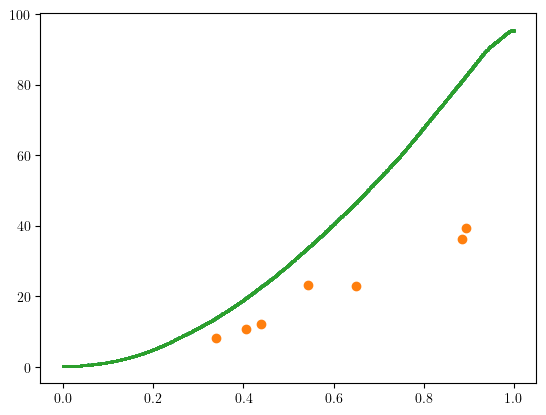

In [4]:
plt.scatter(data_unser[1].dataframe['levels'], data_unser[1].dataframe['mean'], s=1)

pd.set_option('display.max_rows', None) 
print(data_unser[1].dataframe[(data_unser[1].dataframe['mean'] < 21) & (data_unser[1].dataframe['mean'] > 0)].sort_values(by='levels'))

indices = [2178, 2179, 2176, 2174, 2175, 2177, 2173]
plt.scatter(data_unser[1].dataframe.loc[indices]['levels'], data_unser[1].dataframe.loc[indices]['mean'])
data_unser[1].dataframe = data_unser[1].dataframe.drop(indices)
plt.scatter(data_unser[1].dataframe['levels'], data_unser[1].dataframe['mean'], s=1)

1 = 004 Test2 (sc, random)
2 = 004 Test5 (sc, random)
3 = 004 Test8 (sc, random)


/tmp/ipykernel_151683/2709069903.py:20: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()


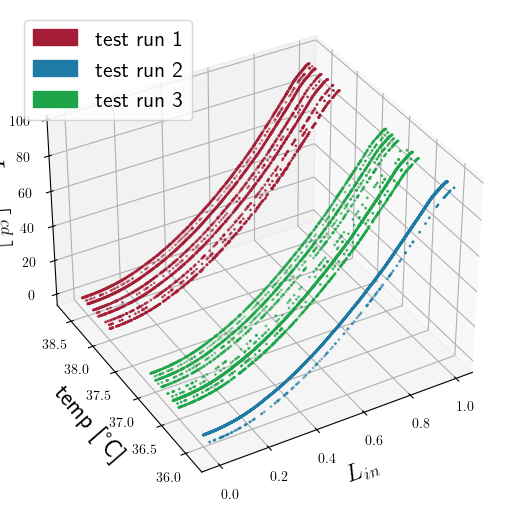

In [5]:
fig, axes = plt.subplots(nrows=1, ncols=1, figsize=(6,5), layout='constrained', subplot_kw={'projection': '3d'})
fontsize = 18
axes.view_init(elev=35, azim=-120);

for j, i in enumerate(data_unser):
    df = i.dataframe
    print(f'{j+1} = {i.name}')
    axes.scatter(df[['levels']], df[['temps']], df[['mean']], s=1, color=Colormap.map[j], label=f'test run {j+1}')

axes.set_xlabel(r'$L_{in}$', fontsize=fontsize)
axes.set_ylabel(r'temp [°C]', fontsize=fontsize)
axes.set_zlabel(r'$L_{out}$ $\left[\frac{cd}{m^2}\right]$', fontsize=fontsize)
handles, labels = axes.get_legend_handles_labels()
patches = []
for handle, label in zip(handles, labels):
    patches.append(mpatches.Patch(color=handle.get_facecolor(), label=label))
legend = axes.legend(handles=patches, fontsize=fontsize-2)

figurePath = f'{baseFigurePath}/04RealData/DataOverview.png'
fig.show()
fig.savefig(figurePath, dpi=300)

## Figure 6.2

In [6]:
dfs = [data_unser[0].dataframe, data_unser[1].dataframe]

merged = pd.concat(dfs)
test_surfaces = []

def select_random_row(group):
    return group.sample(n=1)  # Select one random row from each group
test_surfaces.append(merged.groupby('levels').apply(select_random_row).reset_index(drop=True))
print(test_surfaces[0].sort_values(by='levels'))

        levels       mean              timestamps    temps
0     0.000000   0.240773 2023-06-23 00:58:33.000  38.6250
1     0.000244   0.239591 2023-06-22 21:35:00.000  38.2500
2     0.000488   0.239406 2023-06-22 22:46:28.500  38.5000
3     0.000733   0.246258 2023-06-23 16:21:07.500  36.0000
4     0.000977   0.242495 2023-06-23 00:44:09.000  38.6250
5     0.001221   0.245249 2023-06-23 01:33:07.500  38.3750
6     0.001465   0.247200 2023-06-23 16:55:15.000  36.0000
7     0.001709   0.241737 2023-06-22 21:50:49.500  38.2500
8     0.001954   0.252684 2023-06-23 13:59:22.500  36.0000
9     0.002198   0.249641 2023-06-23 16:39:07.500  36.0000
10    0.002442   0.251200 2023-06-23 13:33:39.000  36.0000
11    0.002686   0.249732 2023-06-23 17:35:00.000  36.0000
12    0.002930   0.243788 2023-06-22 23:24:25.500  38.5000
13    0.003175   0.243818 2023-06-23 01:03:43.500  38.6250
14    0.003419   0.253884 2023-06-23 15:30:43.500  36.0000
15    0.003663   0.242544 2023-06-23 00:04:42.000  38.50

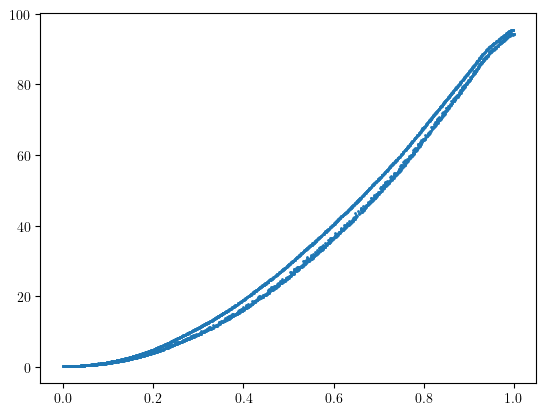

In [7]:
plt.scatter(test_surfaces[0]['levels'], test_surfaces[0]['mean'], s=1)

 Name: test_surfaces[0]
 slice: [0.0, 0.93]
 num. training points: 3809


/home/jonas/Documents/GithubRepo/_venv_/lib/python3.11/site-packages/gpflow/optimizers/scipy.py:152: OptimizeWarning: Unknown solver options: maxiter
  opt_result = scipy.optimize.minimize(


 message: Max. number of function evaluations reached
 success: False
  status: 3
     fun: -3359.312782226305
       x: [-6.526e-01  1.318e+00  2.585e-01 -3.509e-03  8.895e+01
           -2.497e-01  3.540e-03  1.014e+00  2.444e-01  9.998e-01
            2.295e+00]
     nit: 18
     jac: [ 1.914e+03 -1.324e+02 -2.137e+03 -7.624e+04  4.469e-01
           -1.119e+02  5.111e+00  2.035e+03  5.739e+00 -7.913e-02
           -4.062e+01]
    nfev: 111


name,class,transform,prior,trainable,shape,dtype,value
GPR.mean_function.gamma,Parameter,Identity,,True,(),float64,2.2951
GPR.mean_function.alpha,Parameter,Identity,,True,(),float64,1.01398
GPR.mean_function.c1,Parameter,Identity,,True,(),float64,0.24438
GPR.mean_function.c2,Parameter,Identity,,True,(),float64,0.99977
GPR.mean_function.A,Parameter,Identity,,True,"(1, 1)",float64,[[88.94963]]
GPR.mean_function.C,Parameter,Identity,,True,"(1, 1)",float64,[[-0.24967]]
GPR.mean_function.D,Parameter,Identity,,True,"(1, 1)",float64,[[0.00354]]
GPR.kernel.variance,Parameter,Softplus,,True,(),float64,1.555
GPR.kernel.lengthscales,Parameter,Softplus,,True,(),float64,0.41917
GPR.likelihood.scale.A,Parameter,Identity,,True,"(1, 1)",float64,[[0.25847]]


(<tf.Variable 'Variable:0' shape=(1, 1) dtype=float64, numpy=array([[88.94963493]])>, <tf.Variable 'Variable:0' shape=(1, 1) dtype=float64, numpy=array([[-0.24967256]])>, <tf.Variable 'Variable:0' shape=(1, 1) dtype=float64, numpy=array([[0.00354018]])>, <tf.Variable 'Variable:0' shape=() dtype=float64, numpy=1.013981507143225>, <tf.Variable 'Variable:0' shape=() dtype=float64, numpy=0.24438073728797102>, <tf.Variable 'Variable:0' shape=() dtype=float64, numpy=0.9997739537968996>, <tf.Variable 'Variable:0' shape=() dtype=float64, numpy=2.295096782236445>)
prediction by GP (max std: 0.254)


/home/jonas/Documents/GithubRepo/code/./helper/XperimentPlotter.py:326: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()


mean of residuen: 4.04e-05
std. of residuen: 0.111


/home/jonas/Documents/GithubRepo/code/./helper/XperimentPlotter.py:361: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()


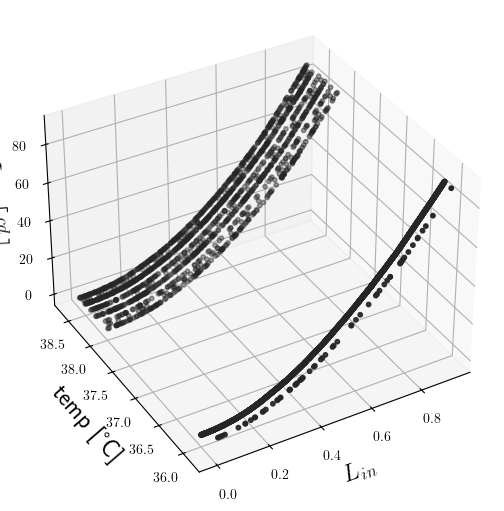

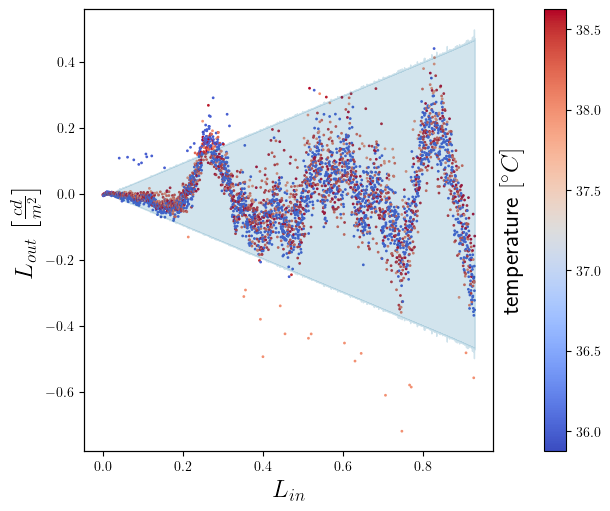

In [8]:
i = 0
basedf = test_surfaces[i]
print(f' Name: test_surfaces[{i}]')
df = pd.DataFrame()
df['L_in'] = basedf['levels']
df['temps'] = basedf['temps']
df['L_out'] = basedf['mean']

kernel = k.SquaredExponential()
mean_funct = ViewpixxAlpha(gamma=2.2, alpha=0, c1=0.24, c2=1, A=100, C=0, D=12)
likelihood = gpflow.likelihoods.Gaussian(scale=LinearNoise(A=0.1, c=gpflow.Parameter(0, trainable=True)))

model = XperimentPlotter.fitApproach(df, 12000, [0.0, 0.93], kernel=kernel, mean_funct=mean_funct, likelihood=likelihood, method='TNC', iterationlimit=1000, showStd=True, path='04RealData/Training')

## Figure 6.3

 slice: [0.0, 0.93]


prediction by GP (max std: 1.244)


/home/jonas/Documents/GithubRepo/code/./helper/XperimentPlotter.py:402: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()


mean of residuen: 0.793
std. of residuen: 2.19


/home/jonas/Documents/GithubRepo/code/./helper/XperimentPlotter.py:437: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()


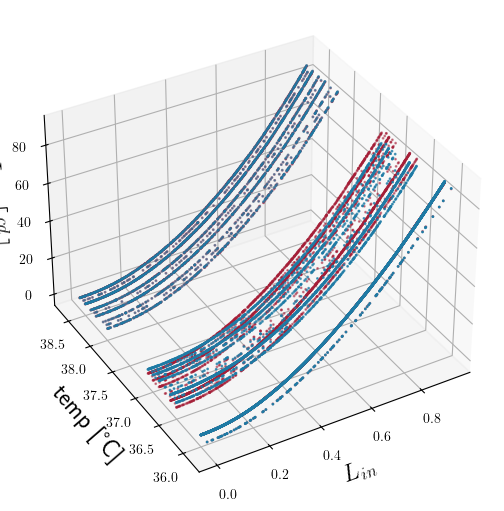

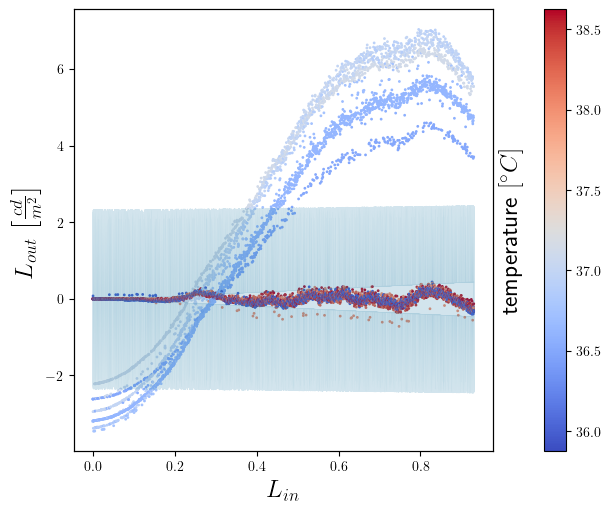

In [9]:
basedf = pd.concat([data_unser[0].dataframe, data_unser[1].dataframe, data_unser[2].dataframe])
df = pd.DataFrame()
df['L_in'] = basedf['levels']
df['temps'] = basedf['temps']
df['L_out'] = basedf['mean']

XperimentPlotter.predictApproach(df, [0.0, 0.93], model, showStd=True, path='04RealData/Prediction2')

## Figure 6.4

/tmp/ipykernel_151683/315373473.py:22: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()


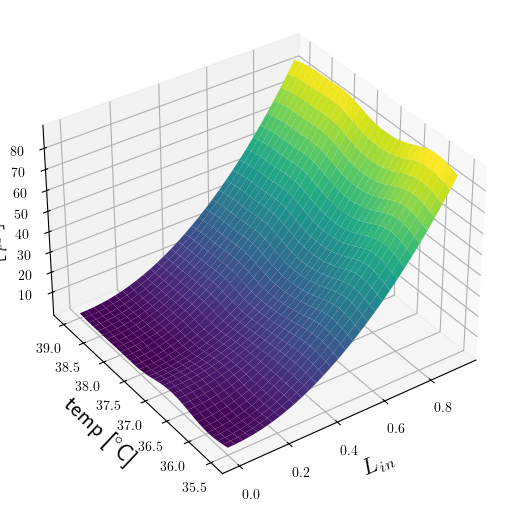

In [10]:
res = 2**5
X = np.linspace(0.0, 0.93, res)
temps = np.linspace(35.5, 39, res)
Xplot1, Xplot2 = np.meshgrid(X, temps)
Xplot = np.stack([Xplot1, Xplot2], axis=-1)
Xplot = Xplot.reshape([res ** 2, 2])
Z, _ = model.predict_f(Xplot)
Z = Z.numpy().reshape((res, res))

fig, axes = plt.subplots(nrows=1, ncols=1, figsize=(6,5), layout='constrained', subplot_kw={'projection': '3d'})
fontsize = 17
axes.plot_surface(Xplot1, Xplot2, Z, cmap=plt.cm.viridis, antialiased=True)

axes.set_xlabel(r'$L_{in}$', fontsize=fontsize)
axes.set_ylabel(r'temp [$^\circ$C]', fontsize=fontsize)
axes.set_zlabel(r'$\Delta_{L_{out}} \left[\frac{cd}{m^2}\right]$', fontsize=fontsize)
axes.view_init(elev=35, azim=-125);

path='04RealData/FullPlane'

figurePath = f'{baseFigurePath}/{path}.png'
fig.show()
fig.savefig(figurePath, dpi=300)